# task147

## 1. 데이터 전처리

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_path = '../data/.train/.task147/train.csv'
test_path = '../data/.train/.task147/test.csv'
submission_path = '../data/.sample_submission/.task147/sample_submission.csv'
car_df_train = pd.read_csv(train_path)
car_df_submission= pd.read_csv(submission_path)
car_df = car_df_train.copy()
car_df.head()

,id,va01,va02,va03,va04,va05,va06,va07,va08,va09,...,dum_4_6,dum_4_7,dum_4_8,dum_4_9,dum_4_10,dum_4_11,dum_4_12,dum_4_13,dum_4_14,ad_periods
0,0,581,0.625567,21755,0,2004,103082,2494,0,0,...,0,0,0,0,0,0,0,0,0,8
1,1,516,0.041143,16814,1,2005,119882,4134,0,0,...,0,0,0,0,0,0,0,0,0,16
2,2,324,0.041143,19229,2,2003,73209,1600,0,0,...,0,0,0,0,0,0,0,0,0,4
3,3,325,0.041143,19248,2,2008,157000,1995,0,0,...,0,0,0,0,0,0,0,0,0,23
4,4,520,0.333355,19781,1,2005,136800,0,0,0,...,0,0,0,0,0,0,0,0,0,21


### target 값 비대칭 -> 로그변환

In [2]:
# SalePrice 로그 변환
originial_Periods = car_df['ad_periods']
car_df['ad_periods'] = np.log1p(car_df['ad_periods'])

### va변수 그림으로 확인

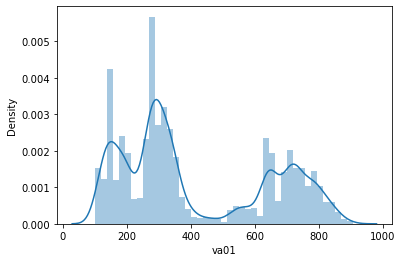

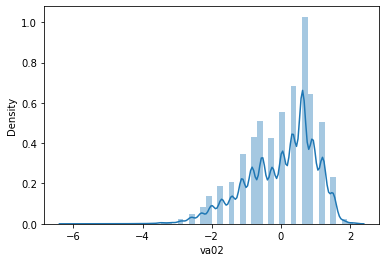

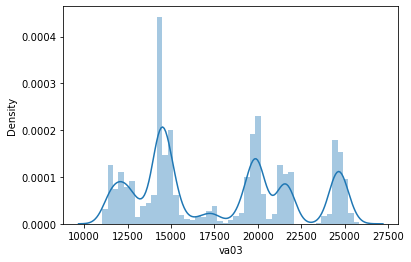

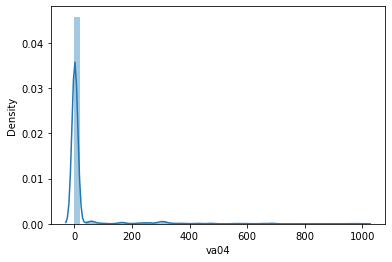

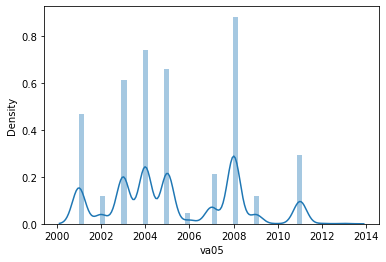

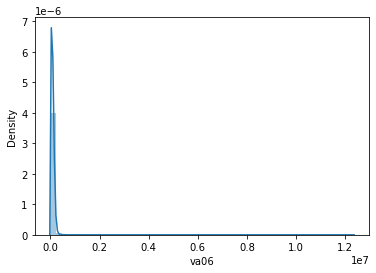

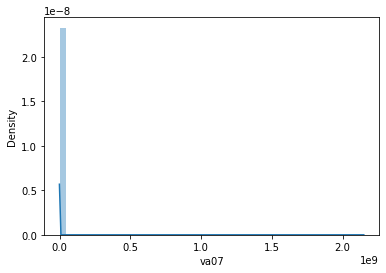

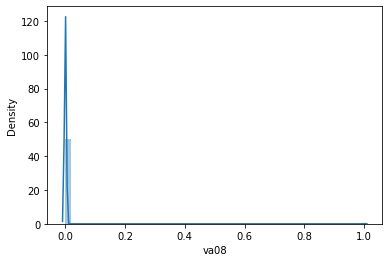

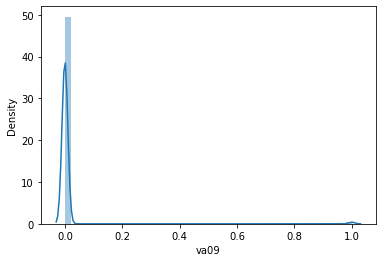

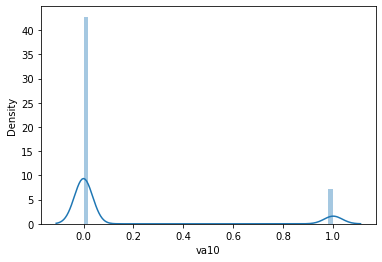

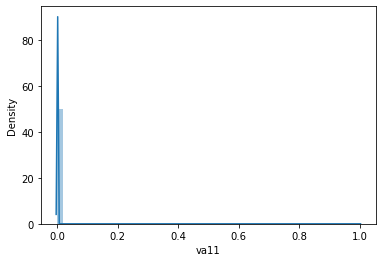

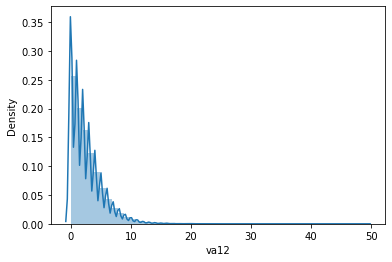

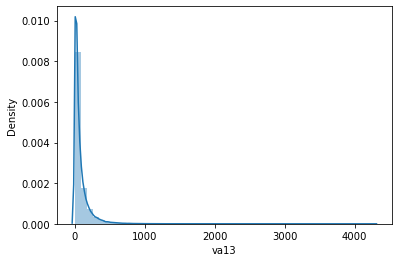

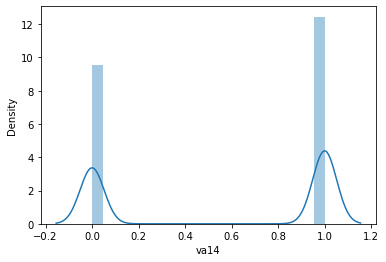

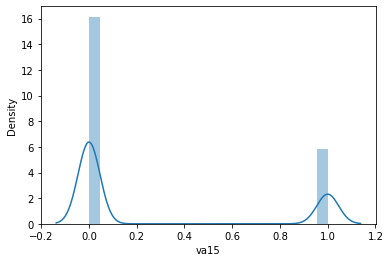

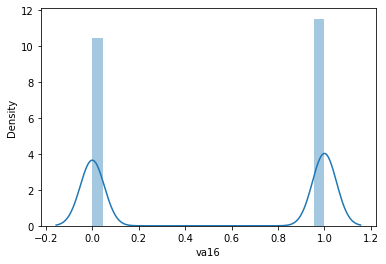

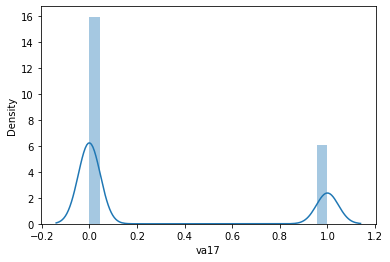

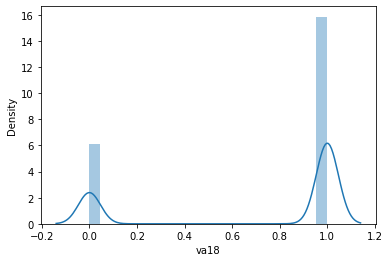

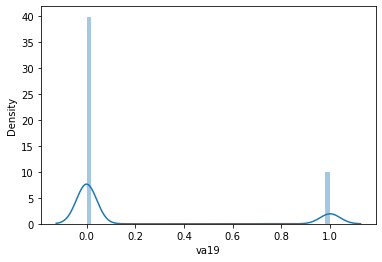

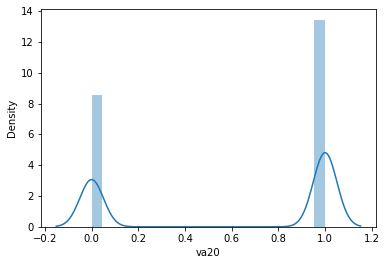

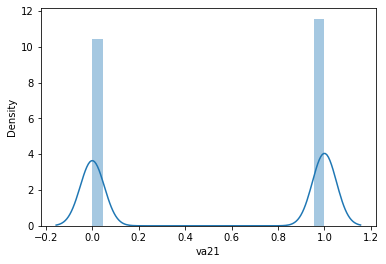

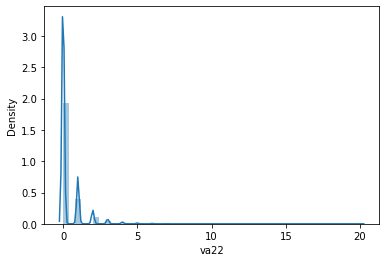

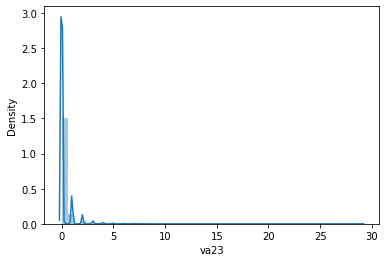

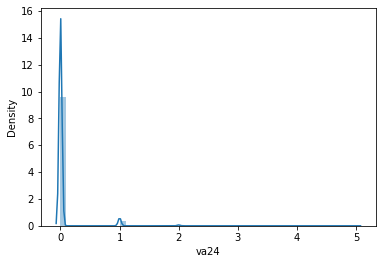

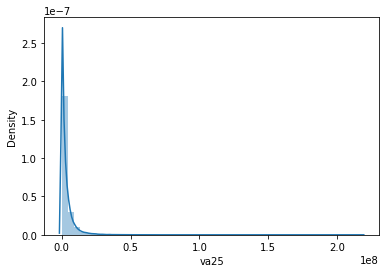

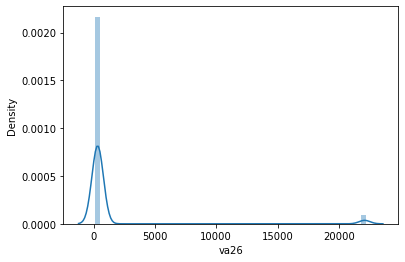

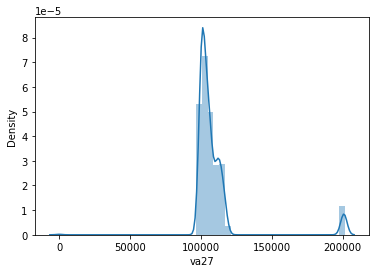

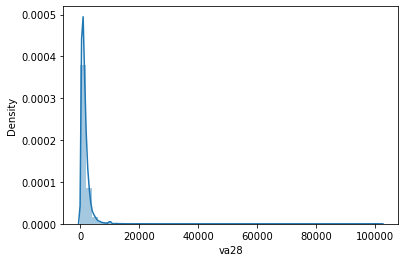

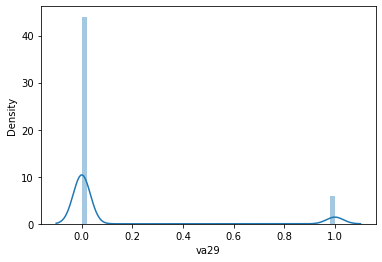

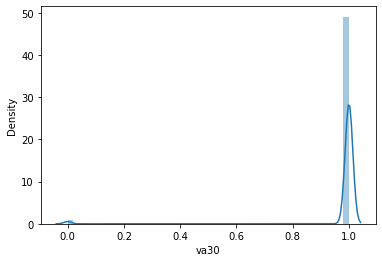

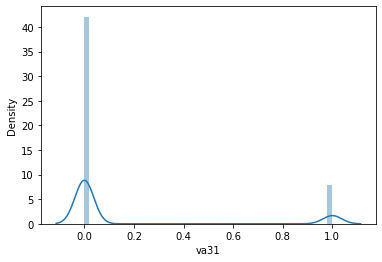

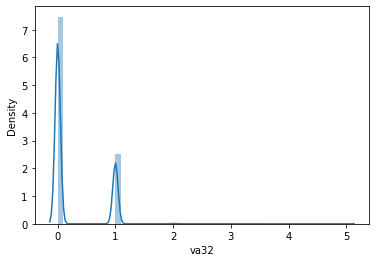

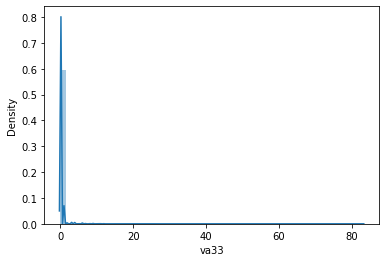

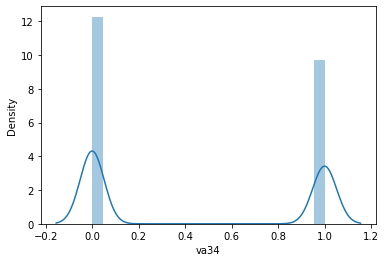

In [3]:
car_va = car_df.filter(regex='^va', axis=1)
cols = car_va.columns

for col in cols:
    fig,ax = plt.subplots(1,1)
    sns.distplot(car_df[col])

In [4]:
# np.log1p()로 정규화할 변수 (왜도가 심한 것처럼 보이는)
col = ['va04', 'va06', 'va07', 'va13', 'va25', 'va28','va12','va33']
car_df[col] = np.log1p(car_df[col])

### 이상치 중간값으로 대체

In [5]:
cond1 = car_df['va07'] > 14
cond2 = car_df['ad_periods'] > 1
outlier_index = car_df[cond1 & cond2].index
print('va07 이상치 레코드 index: ', outlier_index.values)
# 이상치를 해당 변수의 중간값으로 대체
car_df['va07'][outlier_index] = np.median(car_df['va07'])


cond1 = car_df['va22'] >14.0
cond2 = car_df['ad_periods'] > 3
outlier_index = car_df[cond1 & cond2].index
print('va22 이상치 레코드 index: ', outlier_index.values)
# 이상치를 해당 변수의 중간값으로 대체
car_df['va22'][outlier_index] = np.median(car_df['va22'])
# car_df['va22'].drop(outlier_index)

cond1 = car_df['va23'] > 15
cond2 = car_df['ad_periods'] > 3
outlier_index = car_df[cond1 & cond2].index
print('va23 이상치 레코드 index: ', outlier_index.values)
# 이상치를 해당 변수의 중간값으로 대체
car_df['va23'][outlier_index] = np.median(car_df['va23'])

cond1 = car_df['va25'] > 2.5
cond2 = car_df['va25'] < 5.0
outlier_index = car_df[cond1 & cond2].index
print('va25 이상치 레코드 index: ', outlier_index.values)
# 이상치를 해당 변수의 중간값으로 대체
car_df['va25'][outlier_index] = np.median(car_df['va25'])
# car_df['va25'].drop(outlier_index)

va07 이상치 레코드 index:  [14452 23962 47250]
va22 이상치 레코드 index:  [  728 42644]
va23 이상치 레코드 index:  [ 9606 16467 17675 18492 35857 43828 58795 70513 78770]
va25 이상치 레코드 index:  [71861]


In [6]:
car_df.reset_index(drop=True, inplace=True)
car_df['ad_periods']

0        2.197225
1        2.833213
2        1.609438
3        3.178054
4        3.091042
           ...   
82990    1.791759
82991    4.304065
82992    3.295837
82993    0.000000
82994    4.127134
Name: ad_periods, Length: 82995, dtype: float64

### 원핫인코딩

In [7]:
# 원핫 인코딩 va05, va24, va32
cond1 = car_df['va32'] == 5
cond2 = car_df['va24'] == 5

outlier_index = car_df[cond1 | cond2].index

print('이상치 레코드 index: ', outlier_index.values)
print('이상치 삭제 전 car_df shape: ', car_df.shape)

# DataFrame의 인덱스를 이용해 이상치 레코드 삭제
car_df = car_df.drop(outlier_index, axis=0).reset_index(drop=True)
print('이상치 삭제 후 car_df shape: ', car_df.shape)

# category형으로 추정되는 변수 원핫 인코딩
# va05, va24, va32
car_df_ohe = pd.get_dummies(car_df, columns=['va05','va24','va32'])
car_df_ohe.head()

이상치 레코드 index:  [68594 72470]
이상치 삭제 전 car_df shape:  (82995, 69)
이상치 삭제 후 car_df shape:  (82993, 69)


,id,va01,va02,va03,va04,va06,va07,va08,va09,va10,...,va05_2013,va24_0,va24_1,va24_2,va24_3,va24_4,va32_0,va32_1,va32_2,va32_3
0,0,581,0.625567,21755,0.000000,11.543290,7.822044,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,516,0.041143,16814,0.693147,11.694272,8.327243,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2,324,0.041143,19229,1.098612,11.201087,7.378384,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,3,325,0.041143,19248,1.098612,11.964007,7.598900,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,4,520,0.333355,19781,0.693147,11.826283,0.000000,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## 2. 모델

In [8]:
from sklearn.metrics import mean_squared_error

def get_rmse(model):
    pred = np.expm1(model.predict(X_test))
    mse = mean_squared_error(y_test_exp, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, 'RMSE: ', np.round(rmse,3))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return np.round(rmses, 3)

### 최적의 모델과 파라미터 값으로 예측 진행

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor

y_target = car_df_ohe['ad_periods'] # 로그 변환됨
X_features = car_df_ohe.drop('ad_periods', axis=1, inplace=False) # inplace=False 주의
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

y_test_exp = np.expm1(y_test)

xgb_reg2 = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                      colsample_bytree=0.5, subsample=0.8, random_state=156)

xgb_reg2.fit(X_train, y_train, early_stopping_rounds=100,
           eval_metric='rmse', eval_set=[(X_train, y_train), (X_test, y_test)])

get_rmse(xgb_reg2)

[0]	validation_0-rmse:2.86672	validation_1-rmse:2.85801
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:2.74467	validation_1-rmse:2.73618
[2]	validation_0-rmse:2.62061	validation_1-rmse:2.61252
[3]	validation_0-rmse:2.51226	validation_1-rmse:2.50424
[4]	validation_0-rmse:2.41003	validation_1-rmse:2.40225
[5]	validation_0-rmse:2.31236	validation_1-rmse:2.30475
[6]	validation_0-rmse:2.22065	validation_1-rmse:2.21322
[7]	validation_0-rmse:2.13573	validation_1-rmse:2.12848
[8]	validation_0-rmse:2.05478	validation_1-rmse:2.04773
[9]	validation_0-rmse:1.97880	validation_1-rmse:1.97196
[10]	validation_0-rmse:1.90882	validation_1-rmse:1.90212
[11]	validation_0-rmse:1.84316	validation_1-rmse:1.83674
[12]	validation_0-rmse:1.78082	validation_1-rmse:1.77468
[13]	validation_0-rmse:1.72347	validation_1-rmse:1.71757
[14]	validation_0-rmse:1.65786	validation_1-rmse:1.6

[141]	validation_0-rmse:0.74867	validation_1-rmse:0.77122
[142]	validation_0-rmse:0.74817	validation_1-rmse:0.77089
[143]	validation_0-rmse:0.74792	validation_1-rmse:0.77075
[144]	validation_0-rmse:0.74723	validation_1-rmse:0.77030
[145]	validation_0-rmse:0.74694	validation_1-rmse:0.77011
[146]	validation_0-rmse:0.74664	validation_1-rmse:0.76991
[147]	validation_0-rmse:0.74635	validation_1-rmse:0.76979
[148]	validation_0-rmse:0.74613	validation_1-rmse:0.76966
[149]	validation_0-rmse:0.74574	validation_1-rmse:0.76948
[150]	validation_0-rmse:0.74552	validation_1-rmse:0.76933
[151]	validation_0-rmse:0.74503	validation_1-rmse:0.76908
[152]	validation_0-rmse:0.74479	validation_1-rmse:0.76893
[153]	validation_0-rmse:0.74417	validation_1-rmse:0.76849
[154]	validation_0-rmse:0.74386	validation_1-rmse:0.76829
[155]	validation_0-rmse:0.74357	validation_1-rmse:0.76817
[156]	validation_0-rmse:0.74323	validation_1-rmse:0.76799
[157]	validation_0-rmse:0.74273	validation_1-rmse:0.76763
[158]	validati

[283]	validation_0-rmse:0.70596	validation_1-rmse:0.74740
[284]	validation_0-rmse:0.70572	validation_1-rmse:0.74733
[285]	validation_0-rmse:0.70539	validation_1-rmse:0.74721
[286]	validation_0-rmse:0.70525	validation_1-rmse:0.74714
[287]	validation_0-rmse:0.70510	validation_1-rmse:0.74711
[288]	validation_0-rmse:0.70468	validation_1-rmse:0.74692
[289]	validation_0-rmse:0.70446	validation_1-rmse:0.74682
[290]	validation_0-rmse:0.70430	validation_1-rmse:0.74676
[291]	validation_0-rmse:0.70396	validation_1-rmse:0.74648
[292]	validation_0-rmse:0.70378	validation_1-rmse:0.74639
[293]	validation_0-rmse:0.70362	validation_1-rmse:0.74631
[294]	validation_0-rmse:0.70332	validation_1-rmse:0.74613
[295]	validation_0-rmse:0.70312	validation_1-rmse:0.74612
[296]	validation_0-rmse:0.70294	validation_1-rmse:0.74604
[297]	validation_0-rmse:0.70272	validation_1-rmse:0.74594
[298]	validation_0-rmse:0.70247	validation_1-rmse:0.74584
[299]	validation_0-rmse:0.70232	validation_1-rmse:0.74576
[300]	validati

[425]	validation_0-rmse:0.68088	validation_1-rmse:0.73778
[426]	validation_0-rmse:0.68073	validation_1-rmse:0.73778
[427]	validation_0-rmse:0.68061	validation_1-rmse:0.73771
[428]	validation_0-rmse:0.68049	validation_1-rmse:0.73765
[429]	validation_0-rmse:0.68034	validation_1-rmse:0.73764
[430]	validation_0-rmse:0.68017	validation_1-rmse:0.73760
[431]	validation_0-rmse:0.67998	validation_1-rmse:0.73752
[432]	validation_0-rmse:0.67986	validation_1-rmse:0.73753
[433]	validation_0-rmse:0.67971	validation_1-rmse:0.73745
[434]	validation_0-rmse:0.67957	validation_1-rmse:0.73738
[435]	validation_0-rmse:0.67934	validation_1-rmse:0.73738
[436]	validation_0-rmse:0.67913	validation_1-rmse:0.73723
[437]	validation_0-rmse:0.67897	validation_1-rmse:0.73714
[438]	validation_0-rmse:0.67882	validation_1-rmse:0.73716
[439]	validation_0-rmse:0.67861	validation_1-rmse:0.73704
[440]	validation_0-rmse:0.67840	validation_1-rmse:0.73696
[441]	validation_0-rmse:0.67827	validation_1-rmse:0.73694
[442]	validati

[567]	validation_0-rmse:0.65926	validation_1-rmse:0.73071
[568]	validation_0-rmse:0.65921	validation_1-rmse:0.73070
[569]	validation_0-rmse:0.65910	validation_1-rmse:0.73067
[570]	validation_0-rmse:0.65897	validation_1-rmse:0.73064
[571]	validation_0-rmse:0.65883	validation_1-rmse:0.73061
[572]	validation_0-rmse:0.65866	validation_1-rmse:0.73055
[573]	validation_0-rmse:0.65852	validation_1-rmse:0.73049
[574]	validation_0-rmse:0.65836	validation_1-rmse:0.73045
[575]	validation_0-rmse:0.65815	validation_1-rmse:0.73030
[576]	validation_0-rmse:0.65794	validation_1-rmse:0.73020
[577]	validation_0-rmse:0.65767	validation_1-rmse:0.73003
[578]	validation_0-rmse:0.65749	validation_1-rmse:0.72995
[579]	validation_0-rmse:0.65732	validation_1-rmse:0.72991
[580]	validation_0-rmse:0.65726	validation_1-rmse:0.72990
[581]	validation_0-rmse:0.65710	validation_1-rmse:0.72990
[582]	validation_0-rmse:0.65701	validation_1-rmse:0.72987
[583]	validation_0-rmse:0.65682	validation_1-rmse:0.72982
[584]	validati

[709]	validation_0-rmse:0.63947	validation_1-rmse:0.72509
[710]	validation_0-rmse:0.63933	validation_1-rmse:0.72505
[711]	validation_0-rmse:0.63923	validation_1-rmse:0.72506
[712]	validation_0-rmse:0.63911	validation_1-rmse:0.72506
[713]	validation_0-rmse:0.63898	validation_1-rmse:0.72503
[714]	validation_0-rmse:0.63886	validation_1-rmse:0.72503
[715]	validation_0-rmse:0.63877	validation_1-rmse:0.72503
[716]	validation_0-rmse:0.63870	validation_1-rmse:0.72502
[717]	validation_0-rmse:0.63863	validation_1-rmse:0.72499
[718]	validation_0-rmse:0.63860	validation_1-rmse:0.72500
[719]	validation_0-rmse:0.63845	validation_1-rmse:0.72499
[720]	validation_0-rmse:0.63833	validation_1-rmse:0.72495
[721]	validation_0-rmse:0.63824	validation_1-rmse:0.72498
[722]	validation_0-rmse:0.63810	validation_1-rmse:0.72494
[723]	validation_0-rmse:0.63801	validation_1-rmse:0.72496
[724]	validation_0-rmse:0.63792	validation_1-rmse:0.72496
[725]	validation_0-rmse:0.63770	validation_1-rmse:0.72480
[726]	validati

[851]	validation_0-rmse:0.62346	validation_1-rmse:0.72227
[852]	validation_0-rmse:0.62336	validation_1-rmse:0.72224
[853]	validation_0-rmse:0.62328	validation_1-rmse:0.72223
[854]	validation_0-rmse:0.62315	validation_1-rmse:0.72222
[855]	validation_0-rmse:0.62300	validation_1-rmse:0.72221
[856]	validation_0-rmse:0.62282	validation_1-rmse:0.72207
[857]	validation_0-rmse:0.62271	validation_1-rmse:0.72207
[858]	validation_0-rmse:0.62260	validation_1-rmse:0.72209
[859]	validation_0-rmse:0.62252	validation_1-rmse:0.72209
[860]	validation_0-rmse:0.62239	validation_1-rmse:0.72208
[861]	validation_0-rmse:0.62231	validation_1-rmse:0.72210
[862]	validation_0-rmse:0.62216	validation_1-rmse:0.72204
[863]	validation_0-rmse:0.62207	validation_1-rmse:0.72205
[864]	validation_0-rmse:0.62191	validation_1-rmse:0.72202
[865]	validation_0-rmse:0.62178	validation_1-rmse:0.72199
[866]	validation_0-rmse:0.62167	validation_1-rmse:0.72198
[867]	validation_0-rmse:0.62159	validation_1-rmse:0.72197
[868]	validati

[993]	validation_0-rmse:0.60793	validation_1-rmse:0.71911
[994]	validation_0-rmse:0.60779	validation_1-rmse:0.71912
[995]	validation_0-rmse:0.60770	validation_1-rmse:0.71910
[996]	validation_0-rmse:0.60756	validation_1-rmse:0.71904
[997]	validation_0-rmse:0.60744	validation_1-rmse:0.71903
[998]	validation_0-rmse:0.60738	validation_1-rmse:0.71903
[999]	validation_0-rmse:0.60731	validation_1-rmse:0.71901
XGBRegressor RMSE:  34.054


34.05394883351964

In [34]:
# # Save the model
import joblib
joblib.dump(xgb_reg2, './model/model_147.pkl') 

xgb_reg2 = joblib.load('./model/model_147.pkl') 

## 3.Test 값도 같은 전처리 진행

In [20]:
car_df_test = pd.read_csv(test_path)
car_df_test.head()

,id,va01,va02,va03,va04,va05,va06,va07,va08,va09,...,dum_4_5,dum_4_6,dum_4_7,dum_4_8,dum_4_9,dum_4_10,dum_4_11,dum_4_12,dum_4_13,dum_4_14
0,82995,401,-2.296553,15524,1,2003,196000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82996,636,0.625567,19891,70,2008,35773,2199,0,0,...,0,1,0,0,0,0,0,0,0,0
2,82997,777,1.502203,25100,1,2005,10300,2400,0,0,...,0,0,0,0,0,0,0,0,0,0
3,82998,273,-0.543281,14331,1,2001,102000,995,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82999,269,-0.543281,14318,0,2003,84000,1591,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
col = ['va04', 'va06', 'va07', 'va13', 'va25', 'va28','va12','va33']
car_df_test[col] = np.log1p(car_df_test[col])

In [22]:
# 원핫 인코딩 va05, va24, va32
car_df_test_ohe = pd.get_dummies(car_df_test, columns=['va05','va24','va32'])
car_df_test_ohe.head()

,id,va01,va02,va03,va04,va06,va07,va08,va09,va10,...,va05_2013,va24_0,va24_1,va24_2,va24_3,va24_4,va32_0,va32_1,va32_2,va32_3
0,82995,401,-2.296553,15524,0.693147,12.185875,0.000000,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,82996,636,0.625567,19891,4.262680,10.484977,7.696213,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,82997,777,1.502203,25100,0.693147,9.239996,7.783641,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,82998,273,-0.543281,14331,0.693147,11.532738,6.903747,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,82999,269,-0.543281,14318,0.000000,11.338584,7.372746,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [23]:
# 피처 데이터 생성후 model predict
test = car_df_test_ohe[list(car_df_test_ohe.columns)]
result = np.expm1(xgb_reg2.predict(test))

In [24]:
result

array([1.6316626e+00, 4.7753731e+01, 5.5141693e+01, ..., 4.5237630e-03,
       4.2399460e+01, 5.7897240e+01], dtype=float32)

In [25]:
# submit 파일 작성
submission = pd.read_csv(submission_path)
submission['ad_periods'] = [round(x) for x in result]
submission.head()

,id,ad_periods
0,82995,2
1,82996,48
2,82997,55
3,82998,21
4,82999,19


## 4. 결과 제출

In [33]:
submission.to_csv('./prediction/prediction_147.csv', index=False)

In [36]:
import zipfile

with zipfile.ZipFile('./model/model_147.zip', mode='w') as f:
    f.write('./중고차_최종.ipynb', compress_type=zipfile.ZIP_DEFLATED)

# 압축파일에 모델 파일 추가
with zipfile.ZipFile('./model/model_147.zip', mode='a') as f:
    f.write('./model/model_147.pkl', compress_type=zipfile.ZIP_DEFLATED)

In [35]:
from nipa.taskSubmit import nipa_submit

team_id="1345"
task_no="147"
result_path = './prediction/prediction_147.csv'
model_path = './model/model_147.pkl'
nipa_submit(team_id=team_id,
            task_no=task_no,
            result=result_path,
            model=model_path)

20201118122734968658_Hnmu.csv: 200
